# All About Wine

# Project Goal

> Find drivers of wine quality and create a model that can accurately predict wine quality while performing better than baseline.

# Project Description

> Using the dataset for wine quality from Data World, look for any effects of physicochemical properties of wine on its resulting quality.

# Initial Hypotheses

> We believe that density, pH, alcohol, and sulphates will be the best predictors of wine quality.

# Project Plan

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import wrangle as w

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Data acquired from Data World
* Combined both csv's and added additional column to include wine_type
* Each row represents a unique wine sample, its physicochemical properties, and its quality

In [2]:
wines = pd.read_csv('wines.csv')

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Prepare

* Verified datatypes
* Corrected column names
* No nulls present (yet)
* Visualized full dataset for univariate exploration
    * Handled outliers by removing top 1% of values in each column
* Split the data

In [4]:
wines = w.prepare_data(wines)

wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


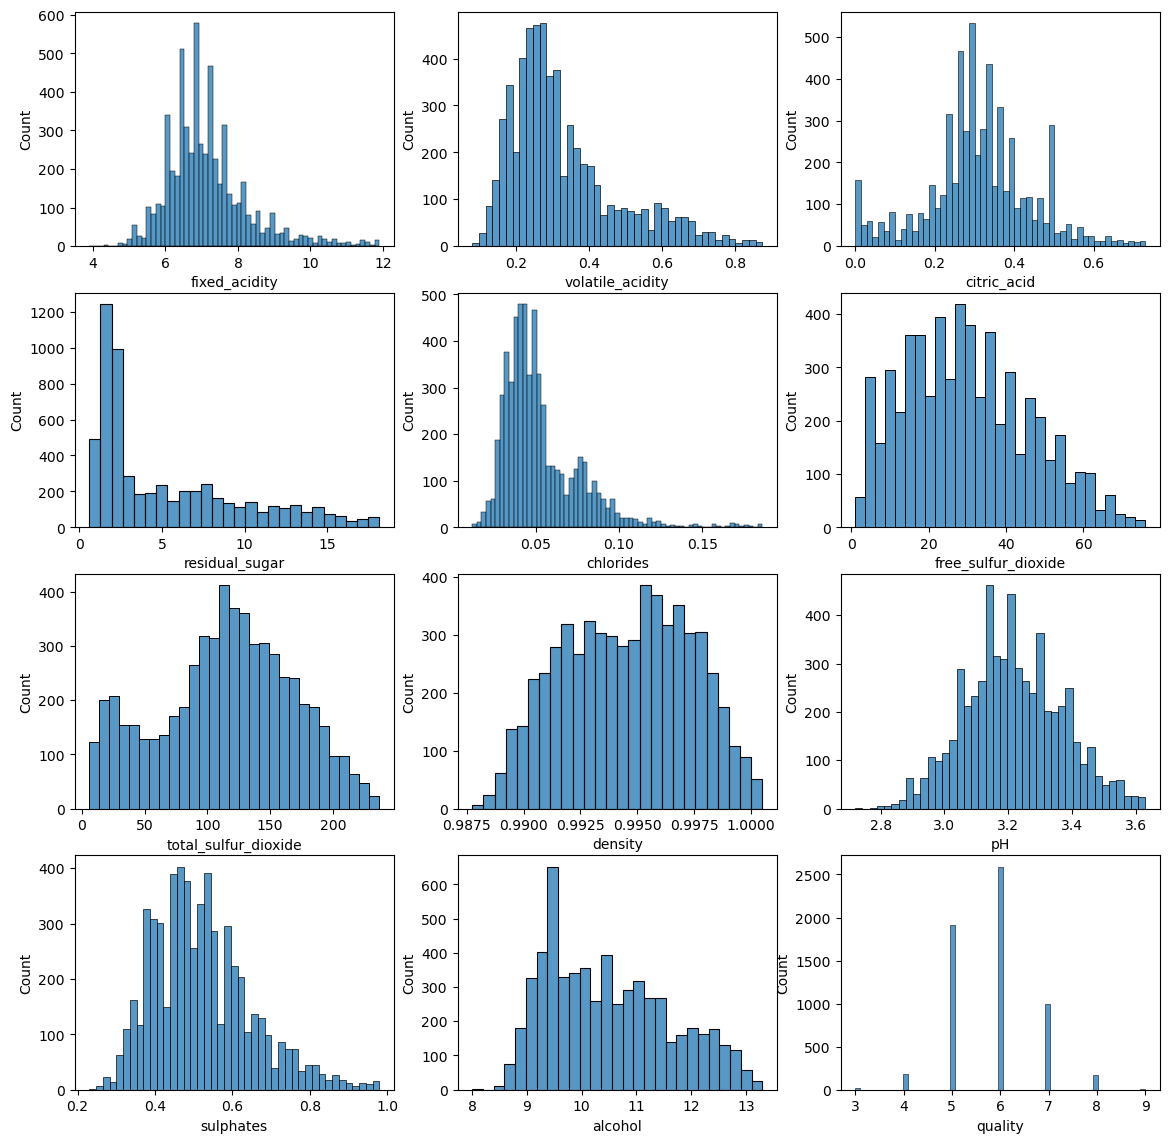

In [5]:
plt.figure(figsize=(14,14))

for i, col in enumerate(wines.drop(columns='wine_type')):
    plt.subplot(4,3,i+1)
    sns.histplot(wines[col])
    
plt.show()

In [6]:
wines.shape

(5871, 13)

In [7]:
train, validate, test = w.split_data(wines)

In [8]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,5,white
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6,white
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6,white
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.99700,3.02,0.63,9.3,5,white


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522 entries, 1811 to 1290
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3522 non-null   float64
 1   volatile_acidity      3522 non-null   float64
 2   citric_acid           3522 non-null   float64
 3   residual_sugar        3522 non-null   float64
 4   chlorides             3522 non-null   float64
 5   free_sulfur_dioxide   3522 non-null   float64
 6   total_sulfur_dioxide  3522 non-null   float64
 7   density               3522 non-null   float64
 8   pH                    3522 non-null   float64
 9   sulphates             3522 non-null   float64
 10  alcohol               3522 non-null   float64
 11  quality               3522 non-null   int64  
 12  wine_type             3522 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 385.2+ KB


## Explore

### Exploring effect of selected four variables to quality

$H_0$: There is no correlation between our selected features (density, pH, alcohol, sulphates) and our target variable (quality).

$H_\alpha$: There is a correlation between our selected features and our target variable (quality).

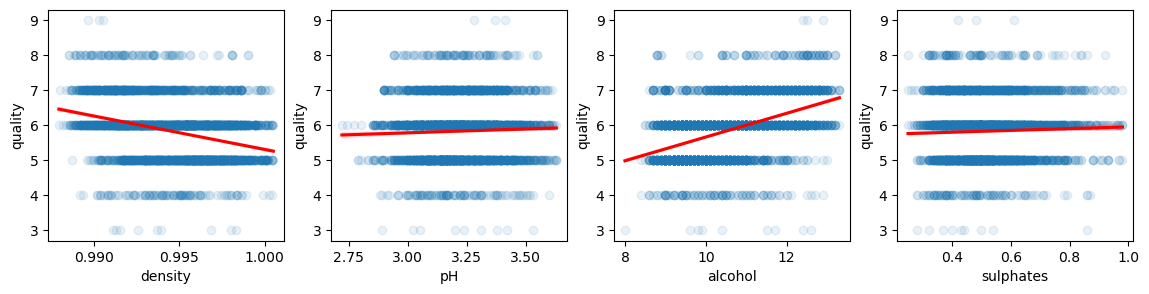

In [10]:
plt.figure(figsize=(14,3))

for i, col in enumerate(train[['density', 'pH', 'alcohol', 'sulphates', 'quality']]):
    if col != 'quality':
        plt.subplot(1, 4, i+1)
        sns.regplot(data = train, x = col, y = 'quality', scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})

plt.show()

In [11]:
corr_df = w.correlation_tests(train[['density', 'pH', 'alcohol', 'sulphates', 'wine_type', 'quality']])

corr_df

,feature,r,p
4,quality,1.000000,0.000000e+00
2,alcohol,0.455295,8.087609e-180
0,density,0.310984,7.757551e-80
1,pH,0.039168,2.009728e-02
3,sulphates,0.038514,2.227002e-02


Although all four features had a p-value close to 0, alcohol and density had the strongest correlations. We will be using those in our modeling.

### What clusters are useful?

Used first six columns to create clusters against quality.

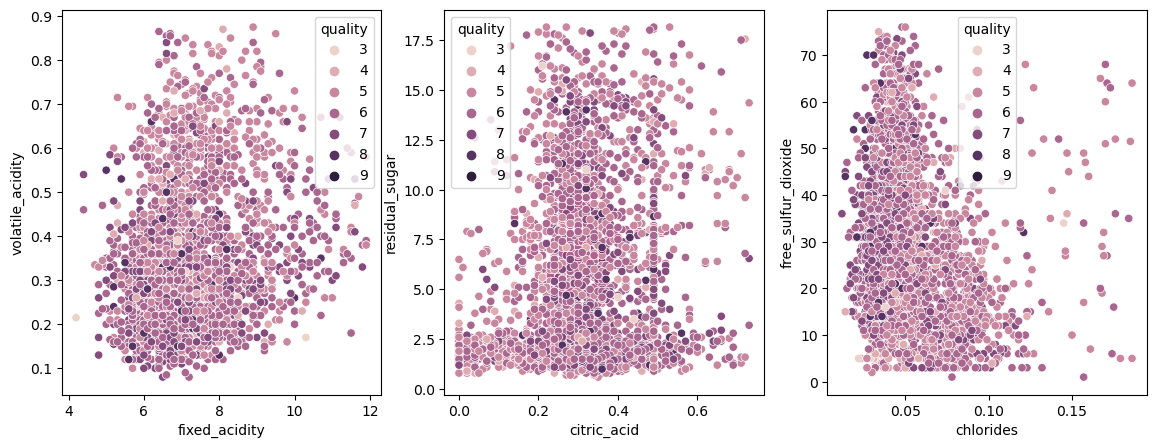

In [12]:
plt.figure(figsize=(14,5))

plt.subplot(131)
sns.scatterplot(data=train, x='fixed_acidity', y='volatile_acidity', hue='quality')

plt.subplot(132)
sns.scatterplot(data=train, x='citric_acid', y='residual_sugar', hue='quality')

plt.subplot(133)
sns.scatterplot(data=train, x='chlorides', y='free_sulfur_dioxide', hue='quality')

plt.show()

Created clusters for the six features above.

$H_0$: There is no difference in the means of the clustered sets amongst each other for quality.

$H_\alpha$: There is a difference in the means of the clusters sets amongst each other for quality.

Ran ANOVA tests on the three clusters towards target variable to select best clustering to send into our model.

In [13]:
train = w.get_dummies_and_hot_encoded(train)
validate = w.get_dummies_and_hot_encoded(validate)
test = w.get_dummies_and_hot_encoded(test)

means_df = w.comparison_of_means(train)

In [14]:
means_df

,feature,T,P
1,cluster_fix_vol_acid,10.665885,2.409064e-05
2,cluster_cit_acd_res_sug,4.053877,1.743607e-02
3,cluster_clorid_diox,48.286319,2.051673e-21


The cluster with the lowest p-value was the chlorides + sulfur dioxide combination. We will go forth with this clustering.

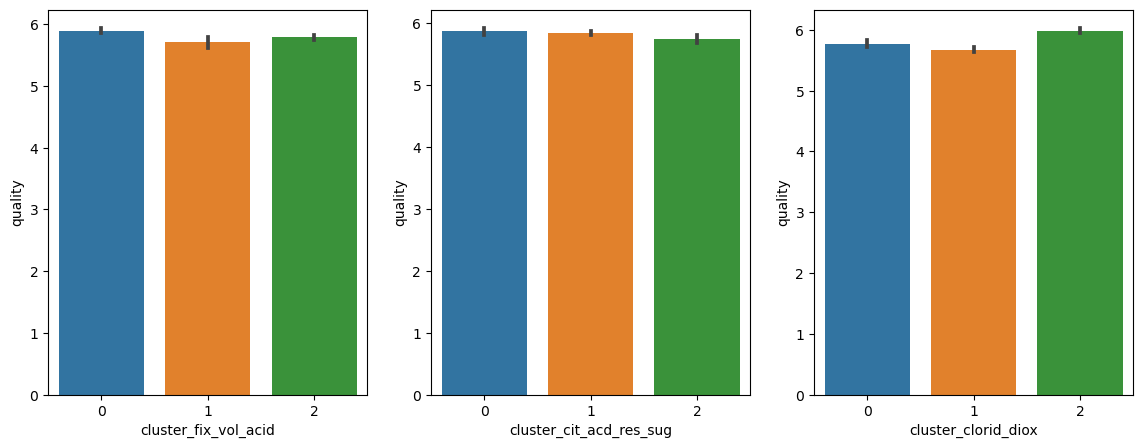

In [15]:
plt.figure(figsize=(14,5))

plt.subplot(131)
sns.barplot(data=train, x='cluster_fix_vol_acid', y='quality')

plt.subplot(132)
sns.barplot(data=train, x='cluster_cit_acd_res_sug', y='quality')

plt.subplot(133)
sns.barplot(data=train, x='cluster_clorid_diox', y='quality')

plt.show()

## Modeling

### Scaling on selected features

In [16]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4,5,white,2,1,1,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.99855,3.24,0.48,9.0,6,white,0,2,2,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6,white,2,2,1,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6,white,2,1,1,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.99700,3.02,0.63,9.3,5,white,0,2,0,1,0,0


In [17]:
train_scaled, validate_scaled, test_scaled =  w.scale_data(train, validate, test)

In [18]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,cluster_fix_vol_acid,cluster_cit_acd_res_sug,cluster_clorid_diox,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.514331,3.15,0.41,0.264151,5,white,2,1,1,1,1,0
3551,5.7,0.22,0.22,16.65,0.044,39.0,110.0,0.844745,3.24,0.48,0.188679,6,white,0,2,2,1,0,1
3338,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.693471,3.17,0.39,0.547170,6,white,2,2,1,1,1,0
1475,7.2,0.08,0.49,1.30,0.050,18.0,148.0,0.522293,3.46,0.44,0.415094,6,white,2,1,1,1,1,0
184,6.8,0.26,0.56,11.90,0.043,64.0,226.0,0.721338,3.02,0.63,0.245283,5,white,0,2,0,1,0,0


In [19]:
X_train, X_validate, X_test, y_train, y_validate, y_test = w.mvp_info(train_scaled, validate_scaled, test_scaled)

In [20]:
X_train.head()

,alcohol,density,wine_type_white,cluster_clorid_diox_1,cluster_clorid_diox_2
1811,0.264151,0.514331,1,1,0
3551,0.188679,0.844745,1,0,1
3338,0.547170,0.693471,1,1,0
1475,0.415094,0.522293,1,1,0
184,0.245283,0.721338,1,0,0


In [21]:
metrics_train_df, metrics_validate_df, metrics_test_df= w.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [22]:
metrics_train_df

,model_train,rmse,r2
0,baseline,0.854524,0.000000
1,ordinary least squared(OLS),0.745613,0.238660
2,lasso lars(lars),0.854524,0.000000
3,Polynomial Regression(poly2),0.737078,0.255992
4,Generalized Linear Model (GLM),0.744901,0.240115


In [23]:
metrics_validate_df

,model_validate,rmse,r2
0,baseline,0.854524,0.000000
1,ordinary least squared(OLS),0.775305,0.218909
2,lasso lars(lars),0.877908,-0.001508
3,Polynomial Regression(poly2),0.769748,0.230067
4,Generalized Linear Model (GLM),0.774245,0.221043


In [24]:
metrics_test_df

,model_validate,rmse,r2
0,baseline,0.854524,0.0000
1,Generalized Linear Model (GLM),0.760000,0.2217


### Modeling Summary

* GLM performed the best

## Conclusion

* Since the top model only performend with an R2 score of 0.22, we cannot move forward with it.
* Solution would be to continue onto next steps in hopes of creating a better model.

# Next Steps

* Look over different sets of clusters among the wine data by going over iterations of the data.
* Find other independent variables that affect the target variable.